<a href="https://colab.research.google.com/github/Sushmitasuman21/Dog-vs-Cat-Classification/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
import tensorflow as tf
!pip install tensorflow
!pip install keras
from tensorflow import keras
!pip install sequential
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

  Preparing metadata (setup.py) ... done
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2856 sha256=81011d56260ea77d5763578455bf31d0829ec08604fbdb6697b38c63214939d5
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built sequential


In [ ]:
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 2

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 50s 70ms/step - loss: 0.6148 - accuracy: 0.6437 - val_loss: 0.5022 - val_accuracy: 0.7496
Epoch 2/2
625/625 [==============================] - 45s 73ms/step - loss: 0.4608 - accuracy: 0.7822 - val_loss: 0.4371 - val_accuracy: 0.8063


In [ ]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 42s 67ms/step - loss: 0.3599 - accuracy: 0.8433 - val_loss: 0.3313 - val_accuracy: 0.8580
Epoch 2/2
625/625 [==============================] - 44s 70ms/step - loss: 0.2809 - accuracy: 0.8783 - val_loss: 0.2986 - val_accuracy: 0.8692


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 43s 68ms/step - loss: 0.2216 - accuracy: 0.9082 - val_loss: 0.2674 - val_accuracy: 0.8850
Epoch 2/2
625/625 [==============================] - 41s 66ms/step - loss: 0.1683 - accuracy: 0.9307 - val_loss: 0.2848 - val_accuracy: 0.8908


In [ ]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 43s 70ms/step - loss: 0.1212 - accuracy: 0.9517 - val_loss: 0.3397 - val_accuracy: 0.8784
Epoch 2/2
625/625 [==============================] - 40s 64ms/step - loss: 0.0874 - accuracy: 0.9661 - val_loss: 0.3815 - val_accuracy: 0.8786


In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(test_generator)
print("test Loss:", loss)
print("test Accuracy:", accuracy)

157/157 [==============================] - 8s 49ms/step - loss: 0.3809 - accuracy: 0.8788
test Loss: 0.38087618350982666
test Accuracy: 0.8787999749183655


In [ ]:
# Save the model
model.save('cat_dog_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


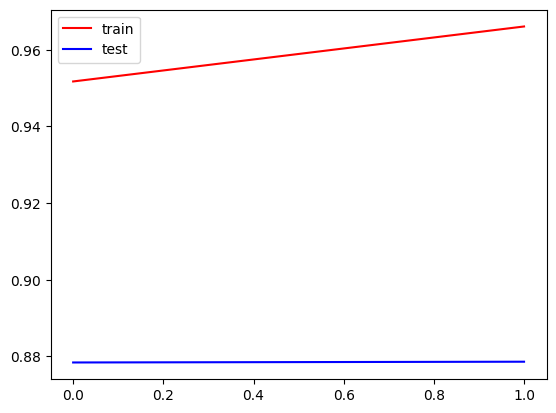

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

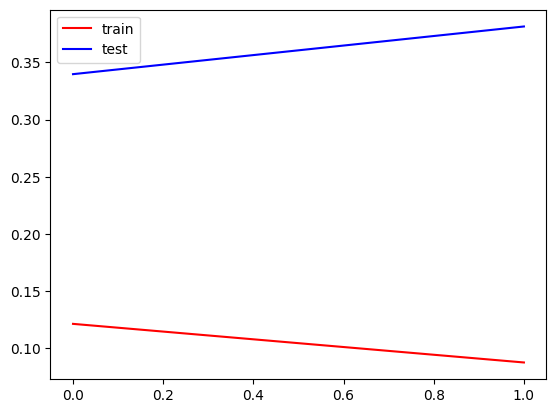

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [32]:
import cv2

In [59]:
test_img = cv2.imread('/content/dog.jpeg')

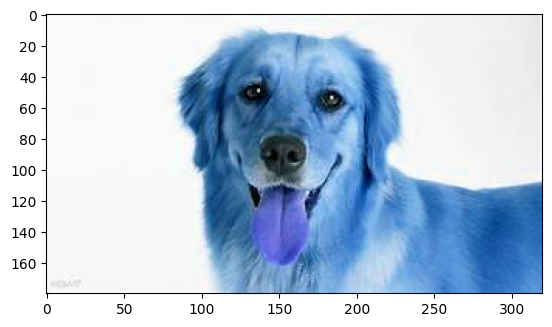

In [60]:
plt.imshow(test_img)

In [61]:
test_img.shape

(180, 320, 3)

In [62]:
test_img = cv2.resize(test_img, (150, 150))

In [63]:
test_img = test_img / 255.0

In [64]:
test_input = test_img.reshape((1, 150, 150, 3))

In [65]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.9741057]], dtype=float32)